# Income Prediction 

## Importing the modules

In [5]:
import numpy as np
import pandas as pd

## Loading dataset

dataset link: https://raw.githubusercontent.com/ybifoundation/Dataset/main/Adult%20Salary.csv

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/ybifoundation/Dataset/main/Adult%20Salary.csv')

## Exploring the dataset

In [7]:
df.head()#viewing the first 5 rows of the dataset

,Age,Gender,WorkingClass,Education,MaritalStatus,Occupation,Relationship,Race,NativeCountry,Income
0,25,Male,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,United-States,<=50K
1,38,Male,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,United-States,<=50K
2,28,Male,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,United-States,>50K
3,44,Male,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,United-States,>50K
4,18,Female,?,Some-college,Never-married,?,Own-child,White,United-States,<=50K


In [8]:
df.info()#obtaining the details and other information of the dataset such as data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            48842 non-null  int64 
 1   Gender         48842 non-null  object
 2   WorkingClass   48842 non-null  object
 3   Education      48842 non-null  object
 4   MaritalStatus  48842 non-null  object
 5   Occupation     48842 non-null  object
 6   Relationship   48842 non-null  object
 7   Race           48842 non-null  object
 8   NativeCountry  48842 non-null  object
 9   Income         48842 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.7+ MB


In [9]:
#printing the data in the occupation column
occupation_set = set(df['Occupation'])
print(occupation_set)

{'Exec-managerial', 'Other-service', 'Priv-house-serv', 'Adm-clerical', 'Craft-repair', 'Handlers-cleaners', 'Protective-serv', 'Prof-specialty', 'Transport-moving', 'Machine-op-inspct', 'Farming-fishing', 'Armed-Forces', 'Sales', 'Tech-support', '?'}


In [10]:
#changing the occupation column as per the standards in the ascending order
df['Occupation'] = df['Occupation'].map({'?': 0, 'Farming-fishing': 1, 'Tech-support': 2, 
                                                       'Adm-clerical': 3, 'Handlers-cleaners': 4, 'Prof-specialty': 5,
                                                       'Machine-op-inspct': 6, 'Exec-managerial': 7, 
                                                       'Priv-house-serv': 8, 'Craft-repair': 9, 'Sales': 10, 
                                                       'Transport-moving': 11, 'Armed-Forces': 12, 'Other-service': 13, 
                                                       'Protective-serv': 14}).astype(int)

In [11]:
df.head()#printing the data's first 5 rows to check the changed column(occupation)

,Age,Gender,WorkingClass,Education,MaritalStatus,Occupation,Relationship,Race,NativeCountry,Income
0,25,Male,Private,11th,Never-married,6,Own-child,Black,United-States,<=50K
1,38,Male,Private,HS-grad,Married-civ-spouse,1,Husband,White,United-States,<=50K
2,28,Male,Local-gov,Assoc-acdm,Married-civ-spouse,14,Husband,White,United-States,>50K
3,44,Male,Private,Some-college,Married-civ-spouse,6,Husband,Black,United-States,>50K
4,18,Female,?,Some-college,Never-married,0,Own-child,White,United-States,<=50K


In [12]:
#printing the data in the education column
education_set = set(df['Education'])
print(education_set)

{'12th', 'Some-college', 'HS-grad', 'Preschool', '5th-6th', 'Assoc-voc', '9th', '11th', 'Assoc-acdm', '10th', 'Prof-school', 'Masters', '7th-8th', 'Doctorate', '1st-4th', 'Bachelors'}


In [13]:
df.head()

,Age,Gender,WorkingClass,Education,MaritalStatus,Occupation,Relationship,Race,NativeCountry,Income
0,25,Male,Private,11th,Never-married,6,Own-child,Black,United-States,<=50K
1,38,Male,Private,HS-grad,Married-civ-spouse,1,Husband,White,United-States,<=50K
2,28,Male,Local-gov,Assoc-acdm,Married-civ-spouse,14,Husband,White,United-States,>50K
3,44,Male,Private,Some-college,Married-civ-spouse,6,Husband,Black,United-States,>50K
4,18,Female,?,Some-college,Never-married,0,Own-child,White,United-States,<=50K


In [14]:
#printing the data in the income column
income_set = set(df['Income'])
print(income_set)

{'>50K', '<=50K'}


In [15]:
#Converting the income range less than 50k as 0 and more than 50k as 1
df['Income'] = df['Income'].map({'<=50K': 0, '>50K': 1}).astype(int)

In [16]:
df.head()#printing to conform the changed dataset

,Age,Gender,WorkingClass,Education,MaritalStatus,Occupation,Relationship,Race,NativeCountry,Income
0,25,Male,Private,11th,Never-married,6,Own-child,Black,United-States,0
1,38,Male,Private,HS-grad,Married-civ-spouse,1,Husband,White,United-States,0
2,28,Male,Local-gov,Assoc-acdm,Married-civ-spouse,14,Husband,White,United-States,1
3,44,Male,Private,Some-college,Married-civ-spouse,6,Husband,Black,United-States,1
4,18,Female,?,Some-college,Never-married,0,Own-child,White,United-States,0


In [17]:
# Importing matlab to plot graphs
import matplotlib as plt
%matplotlib inline

<AxesSubplot:xlabel='Occupation'>

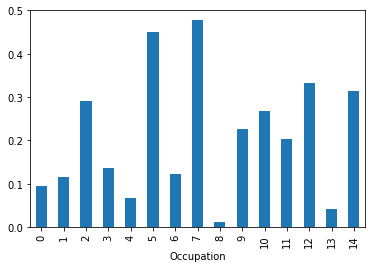

In [18]:
df.groupby('Occupation').Income.mean().plot(kind='bar')#ploting the data occupation and income in a bar graph

In [25]:
#importing models to train test and split the dataset
from sklearn.model_selection import train_test_split

# Taking only the features that is important for now
X = df[['Age', 'Occupation']]

# Taking the labels (Income)
y = df['Income']

# Spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
# Importing C-Support Vector Classification from scikit-learn
from sklearn.svm import SVC

# Declaring the SVC with no tunning
classifier = SVC()

# Fitting the data. This is where the SVM will learn
classifier.fit(X_train, y_train)

SVC()

In [27]:
y_pred= classifier.predict(X_test)#predicting the y results

In [28]:
from sklearn.metrics import plot_confusion_matrix, classification_report,accuracy_score#importing the modules for valaditing the model

C:\Users\GFLAB\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GFLAB\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GFLAB\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GFLAB\anaconda\lib\site-packages\sklearn\utils\de

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      7420
           1       0.00      0.00      0.00      2349

    accuracy                           0.76      9769
   macro avg       0.38      0.50      0.43      9769
weighted avg       0.58      0.76      0.66      9769

0.7595455010748285


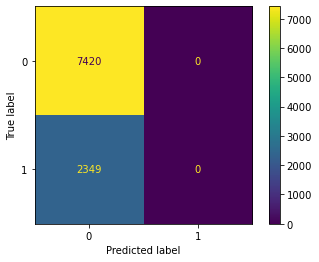

In [31]:
print(classification_report(y_test,y_pred))
plot_confusion_matrix(classifier, X_test, y_test)
# print(accuracy_score(y_test,y_pred))

In [32]:
print(accuracy_score(y_test,y_pred))#accuracy of the model

0.7595455010748285
